In [1]:
! pip install seaborn
! pip install pandas

You should consider upgrading via the 'C:\Users\User\opencv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\User\opencv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\User\\opencv\\Scripts'

In [5]:
data=pd.read_csv("./PROJECT_IPL_1.csv")

In [6]:
# Data has been loaded using pd Function

In [7]:
data.head(5)


,Player Name,Base Price (in Lakhs Rupees),Price Paid (in Lakhs Rupees),Status,Bought by,Previous IPL Teams,Country,Role,Batting Style,Bowling Style,Batting Order,Capped or Uncapped at Internationals (during Auction)
0,Adam Milne,50,320,Sold,MI,RCB,New Zealand,Seam Bowler,-,Right Fast,-,Capped
1,Akash Singh,20,20,Sold,RR,-,India,Seam Bowler,-,Left Medium Fast,-,Uncapped
2,Arjun Tendulkar,20,20,Sold,MI,-,India,Seam Bowler,-,Left Medium Fast,-,Uncapped
3,Ben Cutting,75,75,Sold,KKR,"RR, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
4,Bhagath Varma,20,20,Sold,CSK,-,India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Player Name                                            60 non-null     object
 1   Base Price (in Lakhs Rupees)                           60 non-null     int64 
 2   Price Paid (in Lakhs Rupees)                           60 non-null     int64 
 3   Status                                                 60 non-null     object
 4   Bought by                                              60 non-null     object
 5   Previous IPL Teams                                     60 non-null     object
 6   Country                                                60 non-null     object
 7   Role                                                   60 non-null     object
 8   Batting Style                                          60 non-

In [9]:
data2=pd.read_csv("./PROJECT_IPL_1_Edited.csv")

In [10]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Player Name                                            60 non-null     object
 1   Base Price (in Lakhs Rupees)                           60 non-null     int64 
 2   Price Paid (in Lakhs Rupees)                           60 non-null     int64 
 3   Status                                                 60 non-null     object
 4   Bought by                                              60 non-null     object
 5   Previous IPL Teams                                     37 non-null     object
 6   Country                                                60 non-null     object
 7   Role                                                   60 non-null     object
 8   Batting Style                                          39 non-

In [11]:
### Pie Chart

In [12]:
data2.rename(columns={'Player Name':'Player_Name','Base Price (in Lakhs Rupees)':'Base_Price','Price Paid (in Lakhs Rupees)':'Price_Paid','Status':'Status','Bought by':'Bought_by','Previous IPL Teams':'Previous_IPL_Teams','Country':'Country','Role':'Role','Batting Style':'Batting_Style','Bowling Style':'Bowling_Style','Batting Order':'Batting_Order','Capped or Uncapped at Internationals (during Auction)':'Capped_or_Uncapped'})

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
0,Adam Milne,50,320,Sold,MI,RCB,New Zealand,Seam Bowler,NaN,Right Fast,NaN,Capped
1,Akash Singh,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
2,Arjun Tendulkar,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
3,Ben Cutting,75,75,Sold,KKR,"RR, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
4,Bhagath Varma,20,20,Sold,CSK,NaN,India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
5,C Hari Nishanth,20,20,Sold,CSK,NaN,India,Batsman,Left,NaN,Top,Uncapped
6,Chetan Sakariya,20,120,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
7,Cheteshwar Pujara,50,50,Sold,CSK,"RCB, KKR, PBKS",India,Batsman,Right,NaN,Top,Capped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped
9,Dan Christian,75,480,Sold,RCB,"RCB, RPS, DC, SRH",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Player Name                                            60 non-null     object
 1   Base Price (in Lakhs Rupees)                           60 non-null     int64 
 2   Price Paid (in Lakhs Rupees)                           60 non-null     int64 
 3   Status                                                 60 non-null     object
 4   Bought by                                              60 non-null     object
 5   Previous IPL Teams                                     37 non-null     object
 6   Country                                                60 non-null     object
 7   Role                                                   60 non-null     object
 8   Batting Style                                          39 non-

Text(0.5, 1.0, 'Amount Spent by each team')

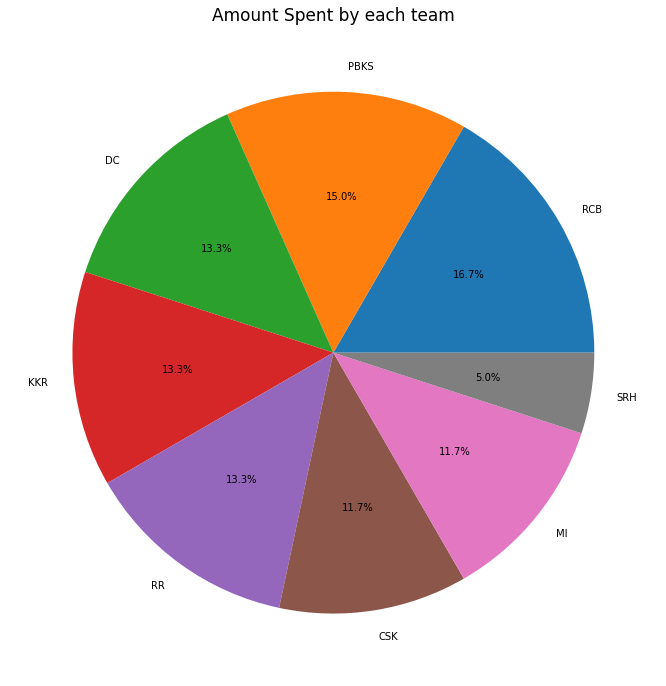

In [14]:
temp=pd.DataFrame({"Amount Spent": data['Bought by']})
count=temp.value_counts()
labels=[X[0] for X in count.keys()]
bar , ax =plt.subplots(figsize=(20,12))
ax=plt.pie(x=count, autopct="%.1f%%",labels= labels)
plt.title("Amount Spent by each team", fontsize=17)


In [14]:
gro=data2.groupby('Bought by')

In [15]:
csk=gro.get_group('CSK')

In [16]:
csk.head(10)

,Player Name,Base Price (in Lakhs Rupees),Price Paid (in Lakhs Rupees),Status,Bought by,Previous IPL Teams,Country,Role,Batting Style,Bowling Style,Batting Order,Capped or Uncapped at Internationals (during Auction)
4,Bhagath Varma,20,20,Sold,CSK,NaN,India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
5,C Hari Nishanth,20,20,Sold,CSK,NaN,India,Batsman,Left,NaN,Top,Uncapped
7,Cheteshwar Pujara,50,50,Sold,CSK,"RCB, KKR, PBKS",India,Batsman,Right,NaN,Top,Capped
14,Harishankar Reddy,20,20,Sold,CSK,NaN,India,Seam Bowler,NaN,Right Medium,NaN,Uncapped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
29,Moeen Ali,200,700,Sold,CSK,RCB,England,Batting All Rounder,Left,Right Offbreak,Top,Capped
59,Robin Uthappa,0,300,Transfer,CSK,"MI, RCB, PWI, KKR, RR",India,Batsman,Right,NaN,Top,Capped


In [ ]:
#Total Amount Spent

In [17]:
csk['Price Paid (in Lakhs Rupees)'].sum()

2035

In [18]:
#Total Amount Spent according to Roles

In [19]:
csk.groupby('Role')['Price Paid (in Lakhs Rupees)'].sum()

Role
Batsman                370
Batting All Rounder    700
Bowling All Rounder    945
Seam Bowler             20
Name: Price Paid (in Lakhs Rupees), dtype: int64